### INFO 5502 Final Exam (05/12/2022, 500 points in total)

<span style='background:yellow'>**Question 1 (100 pt).**</span> We want to create a birthday frequency graph using the data on births in the United States, provided by the Centers for Disease Control (CDC). You can download the data from my GitHub link:https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/births.csv 

Please visualize the data as the following figure using python (you can use any data visualization packages):

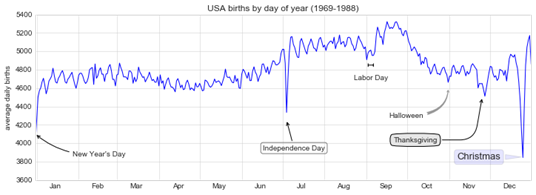

![title](https://github.com/suthapalliuday/Rough-Work/blob/main/SciBERT_cm.png)

In [4]:
#### You code here
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
!pip install scikit-learn

In [133]:
df = pd.read_csv("births.csv")
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [135]:
df.shape

(15547, 5)

In [136]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [137]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [138]:
features = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
features, labels

(array([[1969, 1, 1.0, 'F'],
        [1969, 1, 1.0, 'M'],
        [1969, 1, 2.0, 'F'],
        ...,
        [2008, 11, nan, 'M'],
        [2008, 12, nan, 'F'],
        [2008, 12, nan, 'M']], dtype=object),
 array([  4046,   4440,   4454, ..., 165468, 173215, 181235], dtype=int64))

In [139]:
# import warnings
import warnings 
warnings.filterwarnings('ignore')

In [140]:
quart = np.percentile(df['births'], [25, 50, 75])

data1, data2 = quart[1], 0.74 * (quart[2] - quart[0])

births = df.query('(births > @data1 - 5 * @data2) & (births < @data1 + 5 * @data2)')
print(births)

       year  month   day gender  births
0      1969      1   1.0      F    4046
1      1969      1   1.0      M    4440
2      1969      1   2.0      F    4454
3      1969      1   2.0      M    4548
4      1969      1   3.0      F    4548
...     ...    ...   ...    ...     ...
15062  1988     12  29.0      M    5944
15063  1988     12  30.0      F    5742
15064  1988     12  30.0      M    6095
15065  1988     12  31.0      F    4435
15066  1988     12  31.0      M    4698

[14610 rows x 5 columns]


# Data Visualization using matplotlib & seaborn

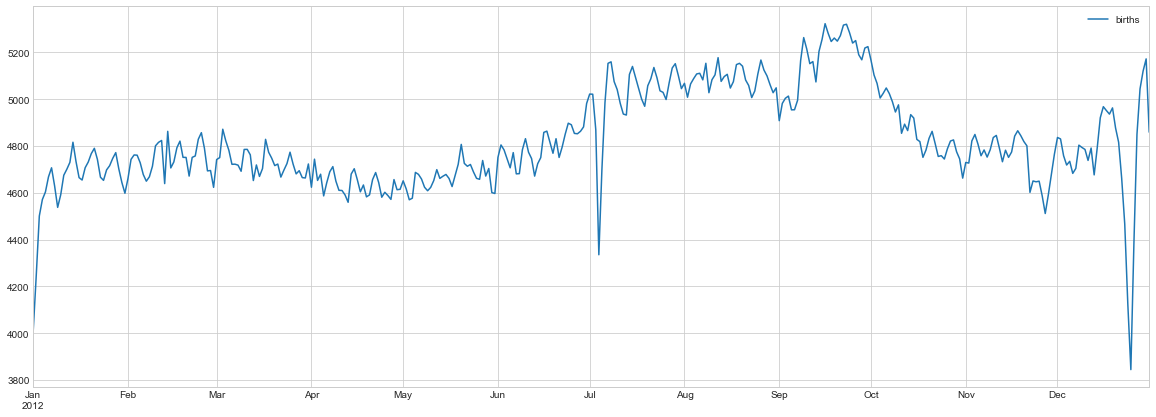

In [141]:
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100  * births.month + births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births',[births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

fig, ax = plt.subplots(figsize=(20, 7))

births_by_date.plot(ax=ax);

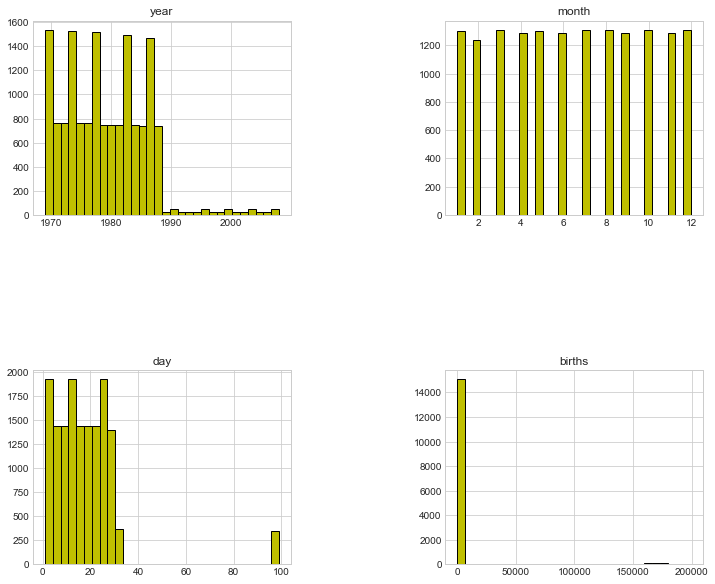

In [142]:
df.hist(figsize=(12,10), bins=30, edgecolor='black', color='y')
plt.subplots_adjust(hspace=0.8, wspace=0.6)

<span style='background:yellow'>**Question 2 (100 pt).**</span> Write a python program to evaluate the text classification performance using accuracy, precision, recall, and f1 score. 

Accuracy = (TP + TN) / (TP+ TN+ FP+ FN)

Recall = (TP) / (TP+FN)

Precision = (TP) / (TP+FP)

F1 Score = (2*Precision*Recall) / (Precision + Recall)

Here is the confusion matrix of a text classfication task (six categories) on the testing data. 

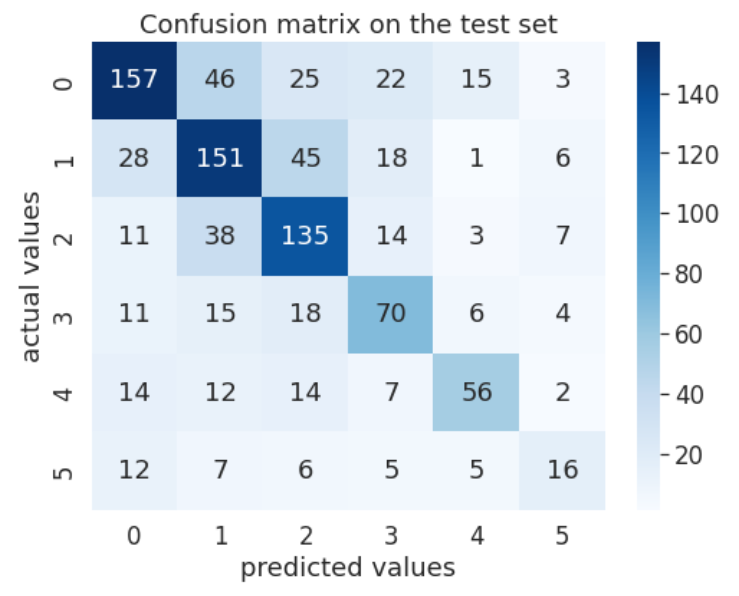

In [143]:
#### You code here
# here i am taken True positive,False positive,False negative, True negative values from above figure

TP = 157
FP = 76
FN = 111
TN = 660
accuracy = (TP + TN) / (TP+ TN+ FP+ FN)
recall = (TP) / (TP+FN)
precision = (TP) / (TP+FP)
f1_score = (2*precision*recall) / (precision + recall)

print("accuracy value is" , accuracy)
print("recall value is",    recall)
print("precision value is", precision)
print("f1_score value is", f1_score)

accuracy value is 0.8137450199203188
recall value is 0.585820895522388
precision value is 0.6738197424892703
f1_score value is 0.626746506986028


In [144]:
# here write about confusion matrix , values taken from above fig.

confusion_matrix = [[157,46,25,22,15,3],
                   [28,151,45,18,1,6],
                   [11,38,135,14,3,7],
                   [11,15,18,70,6,4],
                   [14,12,14,7,56,2],
                   [12,7,6,5,5,16]]

confusion = np.array(confusion_matrix)
confusion

array([[157,  46,  25,  22,  15,   3],
       [ 28, 151,  45,  18,   1,   6],
       [ 11,  38, 135,  14,   3,   7],
       [ 11,  15,  18,  70,   6,   4],
       [ 14,  12,  14,   7,  56,   2],
       [ 12,   7,   6,   5,   5,  16]])

In [145]:
for i in range(len(confusion)):
    
    accuracy = 0
    precision = 0
    recall = 0
    f1_score = 0
    
    TP = confusion[i,i]
    FP = confusion[i,:].sum() - TP
    FN = confusion[:,i].sum() - TP
    TN = confusion.sum().sum() - (TP+FP+FN)
    
    accuracy = (TP+TN)/confusion.sum().sum()
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*precision*recall/(precision+recall)
    
   # print the classes
    print('confusion-matrix values is')
    print('------------------------------------')
    print(' accuracy of class{0} value is' , accuracy)
    print(' precision of class{0} value is ',precision)
    print(' recall of class{0} value is ', recall)
    print(' F1-Score of class{0} value is' ,f1_score)
    print()


confusion-matrix values is
------------------------------------
 accuracy of class{0} value is 0.8139303482587065
 precision of class{0} value is  0.585820895522388
 recall of class{0} value is  0.6738197424892703
 F1-Score of class{0} value is 0.626746506986028

confusion-matrix values is
------------------------------------
 accuracy of class{0} value is 0.7850746268656716
 precision of class{0} value is  0.606425702811245
 recall of class{0} value is  0.5613382899628253
 F1-Score of class{0} value is 0.583011583011583

confusion-matrix values is
------------------------------------
 accuracy of class{0} value is 0.8199004975124378
 precision of class{0} value is  0.6490384615384616
 recall of class{0} value is  0.5555555555555556
 F1-Score of class{0} value is 0.598669623059867

confusion-matrix values is
------------------------------------
 accuracy of class{0} value is 0.8805970149253731
 precision of class{0} value is  0.5645161290322581
 recall of class{0} value is  0.514705882

calculate the all confusion matrix values

In [146]:
def calculate(TP,TN,FP,FN,c):

    accuracy = (TP + TN) / (TP+ TN+ FP+ FN)
    
    recall= (TP) / (TP+FN)
    
    precision = (TP) / (TP+FP)
    
    f1_score = (2*precision*recall) / (precision + recall)
    
    print("-----------------------------------")
    print("class value is ",format(c))
    
    print("accuracy value is" , accuracy)
    
    print("recall value is",    recall)
    
    print("precision value is", precision)
    
    print("f1_score value is"  ,f1_score)
    
    print("------------------------------------")

TP_1=157
TN_1=428
FP_1=76
FN_1=111


TP_2=151
TN_2=434
FP_2=118
FN_2=98



TP_3=135
TN_3=450
FP_3=108
FN_3=73

TP_4=70
TN_4=515
FP_4=66
FN_4=54


TP_5=56
TN_5=529
FP_5=30
FN_5=49



TP_6=16
TN_6=569
FP_6=22
FN_6=35

calculate(TP_1,TN_1,FP_1,FN_1,1)

calculate(TP_2,TN_2,FP_2,FN_2,2)

calculate(TP_3,TN_3,FP_3,FN_3,3)

calculate(TP_4,TN_4,FP_4,FN_4,4)

calculate(TP_5,TN_5,FP_5,FN_5,5)

calculate(TP_6,TN_6,FP_6,FN_6,6)

-----------------------------------
class value is  1
accuracy value is 0.7577720207253886
recall value is 0.585820895522388
precision value is 0.6738197424892703
f1_score value is 0.626746506986028
------------------------------------
-----------------------------------
class value is  2
accuracy value is 0.7303370786516854
recall value is 0.606425702811245
precision value is 0.5613382899628253
f1_score value is 0.583011583011583
------------------------------------
-----------------------------------
class value is  3
accuracy value is 0.7637075718015666
recall value is 0.6490384615384616
precision value is 0.5555555555555556
f1_score value is 0.598669623059867
------------------------------------
-----------------------------------
class value is  4
accuracy value is 0.8297872340425532
recall value is 0.5645161290322581
precision value is 0.5147058823529411
f1_score value is 0.5384615384615384
------------------------------------
-----------------------------------
class value is  5

<span style='background:yellow'>**Question 3 (200 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1)(30 points) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2)(30 points) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3)(30 points) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4)(30 points) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5)(30 points) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in both training and testing data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.


(6)(50 points) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?


# You code here

In [5]:
data1 = pd.read_('inetd-intrusion.int.csv')
data1

FileNotFoundError: [Errno 2] No such file or directory: 'inetd-intrusion.int.csv'

In [186]:
data2=pd.read_csv('inetd-normal.int.csv')
data2

,167 90
0,167 125
1,167 125
2,167 106
3,167 5
4,167 90
...,...
535,2669 6
536,2669 6
537,2669 6
538,2669 6


<span style='background:yellow'>**Question 4 (100 pt).**</span> In the world of business, the importance of the customers’ reviews for any product is not ignorable. The impact of customers’ reviews on customer’s decision making is significant. Therefore, businesses try to increase this impact by increasing the ratio of the positive reviews to negative reviews. One effective way to increase the ratio is offering the incentives such as small gifts or free next services to customers to post the reviews for item they purchase or used. However, it is not always the case, and customer may post their reviews without receiving or accepting the incentives. So, the reviews could be in either incentivized or non-incentivized category.


Considering the importance of reviews, in this question you need to compare these two categories of reviews. One method to compare the effectiveness of two categories is conducting the A/B testing.


The Software_Reviews dataset is collected from software review products, and it is combination of several small datasets. Find the dataset as an attachment on the left side of the page.


You can downlaod the dataset from github: https://github.com/unt-iialab/info5502-spring2022/blob/main/finalexam/Software_Reviews_csv_files_S.csv

(1)(50 points) Clean the dataset before you use (You need to know this dataset is combinations of the several CSV files with title rows. So, there are extra title rows in the middle of the file, which they need to be removed.)


(2)(50 points) Apply an A/B test": consider the “incentivized” column as main column for A & B groups.

a. The “incentivized” column includes ‘NominalGift’, ‘VendorReferredIncentivized’, ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’, ‘None’

b. Group A (Incentive): ‘NominalGift’, and ‘VendorReferredIncentivized’

c. Group B (NoIncentive): ‘NoIncentive’, ‘NonNominalGift’, ‘VendorReferred’

d. Make the decision if ‘None’ includes in either Group A or B or remove that.

e. The “OverAllRating” is another column that is used to compare groups A and B.

Which one A or B group has higher “OverAllRating”?

In [157]:
#### You code and your answer here here


from scipy.stats import norm

data5=pd.read_csv('Software_Reviews_csv_files_S.csv')
group_a = data5[(data5['incentivized'] == "NominalGift") | (data5['incentivized'] == "VendorReferredIncentivized")]['OverAllRating']#.shape
group_b = data5[(data5['incentivized'] == "NoIncentive") | (data5['incentivized'] == "NonNominalGift") | (data5['incentivized'] == "VendorReferred")]['OverAllRating']#.shape

N_con1 = group_a.shape[0]
N_exp1 = group_b.shape[0]

# Significance Level
alpha = 0.05

mu_con1 = np.mean(group_a)
mu_exp1 = np.mean(group_b)

print(group_a)




1       4
2       1
3       4
15      5
17      5
       ..
2994    5
2995    5
2996    5
2997    5
2998    5
Name: OverAllRating, Length: 1015, dtype: object


In [158]:
group_a = group_a.astype('float64')
group_b = group_b.astype('float64')
var_con = np.var(group_a)
var_exp = np.var(group_b)

In [163]:
pooled_var = np.sqrt(var_con/N_con1 + var_exp/N_exp)
T = (mu_con-mu_exp)/np.sqrt(var_con/N_con1 + var_exp/N_exp)
p_value = norm.sf(T)*2


In [161]:
Z_crit  = norm.ppf(1-alpha/2)
m = Z_crit*pooled_variance
CI = [(mu_con1 - mu_exp1) - m, (mu_con1 - mu_exp1) + m]


In [180]:
print("Test Statistics is : ", T)
print('------------------------')
print("Z-critical is: ",     Z_crit)
print('------------------------')
print("P_value is: ",        p_value)
print('------------------------')
print("Confidence Interval of 2 sample Z-test for proportions value is: ", np.round(CI,2))
print('------------------------')

z = np.arange(-3.5,3.5,  0.2)



Test Statistics is :  nan
------------------------
Z-critical is:  1.959963984540054
------------------------
P_value is:  nan
------------------------
Confidence Interval of 2 sample Z-test for proportions value is:  [nan nan]
------------------------


# Data Visualization

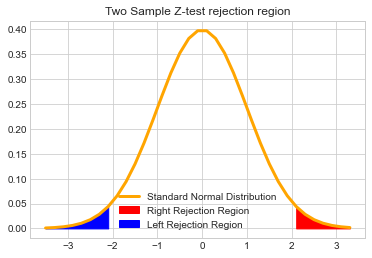

In [199]:
plt.plot(z, norm.pdf(z), label = 'Standard Normal Distribution',color = '',linewidth = 3)

plt.fill_between(z[z>Z_crit], norm.pdf(z[z>Z_crit]), label = 'Right Rejection Region',color ='red' )
plt.fill_between(z[z<(-1)*Z_crit], norm.pdf(z[z<(-1)*Z_crit]), label = 'Left Rejection Region',color ='blue' )
plt.title("Two Sample Z-test rejection region")
plt.legend()
plt.show()